In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [35]:
df = pd.read_csv("titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [36]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

## Imputing using pandas

In [37]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2
)

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [39]:
X_train.isnull().sum()

Age       148
Fare       36
Family      0
dtype: int64

In [40]:
mean_age = X_train["Age"].mean()
median_age = X_train["Age"].median()

mean_fare = X_train["Fare"].mean()
median_fare = X_train["Fare"].median()

In [41]:
X_train["Age_mean"] = X_train["Age"].fillna(mean_age)
X_train["Age_median"] = X_train["Age"].fillna(median_age)

X_train["Fare_mean"] = X_train["Fare"].fillna(mean_fare)
X_train["Fare_median"] = X_train["Fare"].fillna(median_fare)

In [42]:
X_train.sample(10)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
772,57.0,10.5000,0,57.000000,57.00,10.5000,10.5000
222,51.0,8.0500,0,51.000000,51.00,8.0500,8.0500
278,7.0,29.1250,5,7.000000,7.00,29.1250,29.1250
467,56.0,26.5500,0,56.000000,56.00,26.5500,26.5500
341,24.0,263.0000,5,24.000000,24.00,263.0000,263.0000
654,18.0,6.7500,0,18.000000,18.00,6.7500,6.7500
463,48.0,13.0000,0,48.000000,48.00,13.0000,13.0000
569,32.0,7.8542,0,32.000000,32.00,7.8542,7.8542
349,42.0,8.6625,0,42.000000,42.00,8.6625,8.6625
223,NaN,7.8958,0,29.785904,28.75,7.8958,7.8958


### After Imputing you need to chech few things

#### 1. After mean and median imputation the variance will shrink
#### We need to make sure it doesn't shrink too much

In [43]:
print("Original Age variable variance: ", X_train["Age"].var())
print("Age variance after mean imputation: ", X_train["Age_mean"].var())
print("Age variance after median imputation: ", X_train["Age_median"].var())

print("Original Fare variable variance: ", X_train["Fare"].var())
print("Fare variance after mean imputation: ", X_train["Fare_mean"].var())
print("Fare variance after median imputation: ", X_train["Fare_median"].var())

Original Age variable variance:  204.34951339046142
Age variance after mean imputation:  161.81262452718676
Age variance after median imputation:  161.98956633460548
Original Fare variable variance:  2448.1979137063163
Fare variance after mean imputation:  2324.2385256705534
Fare variance after median imputation:  2340.09102197536


#### 2. Second thing to notice is change in distribution

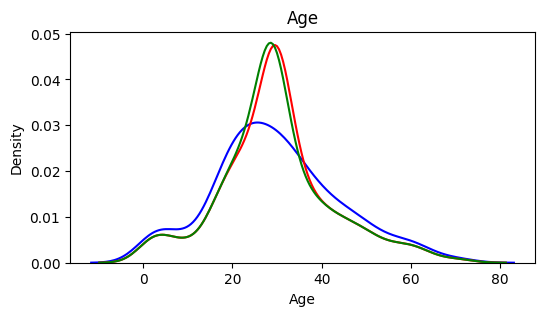

In [51]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 3))

sns.kdeplot(X_train["Age"], ax=ax1, color="blue")
sns.kdeplot(X_train["Age_mean"], ax=ax1, color="red")
sns.kdeplot(X_train["Age_median"], ax=ax1, color="green")

ax1.set_title("Age")

plt.show()

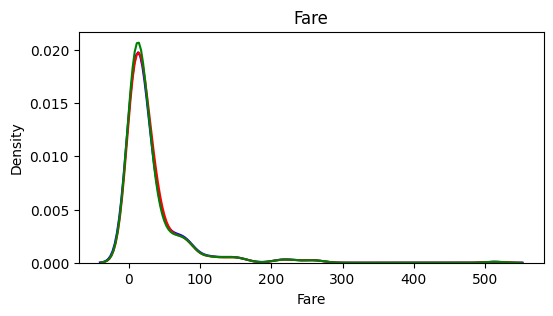

In [52]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 3))

sns.kdeplot(X_train["Fare"], ax=ax1, color="blue")
sns.kdeplot(X_train["Fare_mean"], ax=ax1, color="red")
sns.kdeplot(X_train["Fare_median"], ax=ax1, color="green")

ax1.set_title("Fare")

plt.show()

#### 3. Covariance

In [53]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


#### 4. Correlation

In [ ]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


#### 5. Box Plot

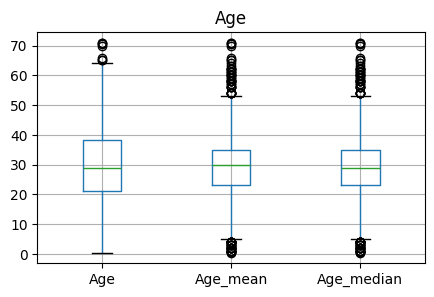

In [60]:
plt.figure(figsize=(5, 3))
X_train[["Age", "Age_mean", "Age_median"]].boxplot()
plt.title("Age")
plt.show()

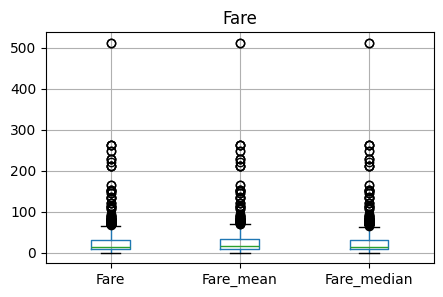

In [61]:
plt.figure(figsize=(5, 3))
X_train[["Fare", "Fare_mean", "Fare_median"]].boxplot()
plt.title("Fare")
plt.show()

## Imputing using sklearn

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2
)

In [65]:
imputer1 = SimpleImputer(strategy="mean")
imputer2 = SimpleImputer(strategy="median")

In [66]:
trf = ColumnTransformer([
    ("mean_imputer", imputer1, ["Fare"]),
    ("median_imputer", imputer2, ["Age"])
], remainder="passthrough")

In [67]:
trf.fit_transform(X_train)

array([[ 27.7208,  40.    ,   0.    ],
       [ 16.7   ,   4.    ,   2.    ],
       [  9.    ,  47.    ,   0.    ],
       ...,
       [ 49.5042,  71.    ,   0.    ],
       [221.7792,  28.75  ,   0.    ],
       [ 25.925 ,  28.75  ,   0.    ]], shape=(712, 3))

In [68]:
X_train_transformed = trf.transform(X_train)
X_test_transformed = trf.transform(X_test)

In [70]:
pd.DataFrame(X_train_transformed, columns=X_train.columns)

,Age,Fare,Family
0,27.7208,40.00,0.0
1,16.7000,4.00,2.0
2,9.0000,47.00,0.0
3,31.3875,9.00,6.0
4,9.8458,20.00,0.0
...,...,...,...
707,8.6625,30.00,0.0
708,8.7125,28.75,0.0
709,49.5042,71.00,0.0
710,221.7792,28.75,0.0
